**1.1** Is there a relationship between water salinity & water temperature? Can you predict the water temperature based on salinity?

*Libraries*

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

sns.set()

*Loading data*

In [ ]:
ocean = pd.read_csv('/content/drive/MyDrive/bottle.csv')

ocean.info()  #show info about dataset
ocean.describe()  #show description

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (47,73) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864863 entries, 0 to 864862
Data columns (total 74 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Cst_Cnt              864863 non-null  int64  
 1   Btl_Cnt              864863 non-null  int64  
 2   Sta_ID               864863 non-null  object 
 3   Depth_ID             864863 non-null  object 
 4   Depthm               864863 non-null  int64  
 5   T_degC               853900 non-null  float64
 6   Salnty               817509 non-null  float64
 7   O2ml_L               696201 non-null  float64
 8   STheta               812174 non-null  float64
 9   O2Sat                661274 non-null  float64
 10  Oxy_µmol/Kg          661268 non-null  float64
 11  BtlNum               118667 non-null  float64
 12  RecInd               864863 non-null  int64  
 13  T_prec               853900 non-null  float64
 14  T_qual               23127 non-null   float64
 15  S_prec           

,Cst_Cnt,Btl_Cnt,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,BtlNum,...,R_CHLA,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1
count,864863.000000,864863.000000,864863.000000,853900.000000,817509.000000,696201.000000,812174.000000,661274.000000,661268.000000,118667.000000,...,225276.000000,225275.000000,864863.000000,122006.000000,1999.000000,224.000000,2084.000000,234.000000,10.000000,84.000000
mean,17138.790958,432432.000000,226.831951,10.799677,33.840350,3.392468,25.819394,57.103779,148.808694,10.497426,...,0.450225,0.198599,228.395694,162.071521,2153.239714,2168.148330,2256.055845,2278.858803,7.948570,7.910983
std,10240.949817,249664.587269,316.050259,4.243825,0.461843,2.073256,1.167787,37.094137,90.187533,6.189688,...,1.208566,0.376539,319.456731,85.722796,112.995202,154.852332,34.844435,58.496495,0.021216,0.077666
min,1.000000,1.000000,0.000000,1.440000,28.431000,-0.010000,20.934000,-0.100000,-0.434900,0.000000,...,-0.010000,-3.890000,0.000000,0.000000,1948.850000,1969.440000,2181.570000,2198.150000,7.923100,7.618300
25%,8269.000000,216216.500000,46.000000,7.680000,33.488000,1.360000,24.965000,21.100000,60.915470,5.000000,...,0.050000,0.050000,46.000000,200.000000,2028.330000,2008.977500,2230.322500,2229.062500,7.931475,7.898675
50%,16848.000000,432432.000000,125.000000,10.060000,33.863000,3.440000,25.996000,54.400000,151.064150,10.000000,...,0.160000,0.110000,126.000000,206.000000,2170.640000,2265.885000,2244.325000,2247.505000,7.946650,7.928850
75%,26557.000000,648647.500000,300.000000,13.880000,34.196900,5.500000,26.646000,97.600000,240.379600,16.000000,...,0.390000,0.230000,302.000000,214.000000,2253.810000,2315.525000,2278.505000,2316.452500,7.963300,7.955100
max,34404.000000,864863.000000,5351.000000,31.140000,37.034000,11.130000,250.784000,214.100000,485.701800,25.000000,...,66.110000,65.300000,5458.000000,424.000000,2367.800000,2364.420000,2434.900000,2437.000000,7.988300,8.047700


In [ ]:
ocean.columns

*Preprocessing*

In [ ]:
data = ocean.copy()

sample = data[['Depthm', 'T_degC']].dropna()

corr = sample.corr(method='pearson')

In [ ]:
fig = px.imshow(round(corr,2), text_auto=True)
fig.show()

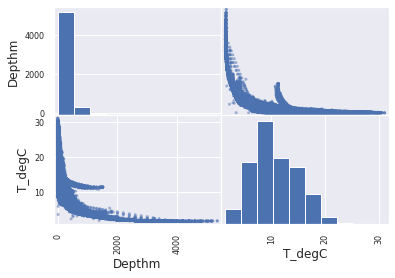

In [ ]:
_ = scatter_matrix(sample)

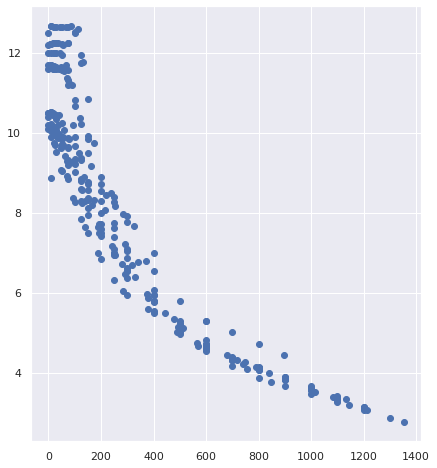

In [ ]:
plt.figure(figsize=(7, 8))
plt.scatter(sample['Depthm'][: 300], sample['T_degC'][: 300])
plt.show()

In [ ]:
temperature = np.sort(sample['T_degC'].to_numpy()).reshape(-1, 1)
depth = np.sort(sample['Depthm'].to_numpy()).reshape(-1, 1)

In [ ]:
from sklearn import preprocessing
temperature = preprocessing.power_transform(temperature, method='box-cox')

(array([  6078.,  26788.,  84649., 178387., 219662., 160477., 133652.,
         38132.,   5095.,    980.]),
 array([-3.10552189, -2.43552747, -1.76553306, -1.09553864, -0.42554422,
         0.2444502 ,  0.91444462,  1.58443903,  2.25443345,  2.92442787,
         3.59442229]),
 <a list of 10 Patch objects>)

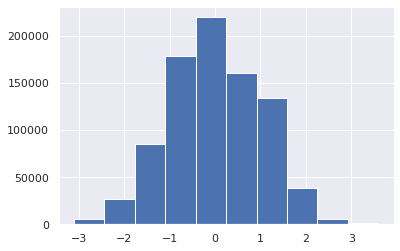

In [ ]:
plt.hist(temperature)

*Cross-validation*

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(depth, temperature, test_size=0.30)


*Model*

In [ ]:
from sklearn.preprocessing import PolynomialFeatures, FunctionTransformer
from sklearn.linear_model import LinearRegression

transformer = FunctionTransformer(np.log1p, validate=True)
X = transformer.transform(X_train)



reg = LinearRegression()
reg.fit(X, y_train)

y_pred = reg.predict(X)

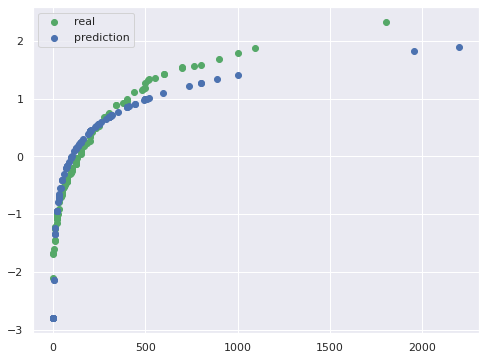

In [23]:
plt.figure(figsize=(8, 6))
plt.scatter(X_test[:100], y_test[:100], c='g', label='real')
plt.scatter(X_train[:100], y_pred[:100], c='b', label='prediction')

plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import r2_score

r2_score(y_pred, y_train)

0.9232534396331531

In [ ]:
residual = (y_train - y_pred)
residual

array([[-0.24775197],
       [ 0.23018685],
       [ 0.26798597],
       ...,
       [ 0.46477011],
       [ 0.10965079],
       [-0.21046952]])

(array([2.1420e+03, 4.1826e+04, 3.9797e+04, 4.9625e+04, 5.7228e+04,
        2.6996e+04, 2.1973e+04, 2.9837e+04, 2.5274e+04, 1.6529e+04,
        1.0754e+04, 6.5910e+03, 2.6460e+04, 6.2760e+03, 6.2000e+03,
        5.4490e+03, 1.3488e+04, 2.1068e+04, 8.4010e+03, 1.3963e+04,
        1.5562e+04, 1.4574e+04, 3.6800e+03, 1.4870e+04, 1.4580e+04,
        3.0520e+03, 3.4110e+03, 3.0520e+03, 5.3890e+03, 1.8521e+04,
        9.5980e+03, 1.0689e+04, 6.6600e+03, 1.3470e+03, 2.3910e+03,
        1.7920e+03, 1.2120e+03, 1.8280e+03, 3.0890e+03, 2.1700e+03,
        2.9240e+03, 3.2900e+03, 7.9700e+02, 5.6400e+02, 1.5990e+03,
        1.5510e+03, 1.6920e+03, 1.8320e+03, 1.0520e+03, 6.7800e+02,
        7.5500e+02, 8.1200e+02, 7.4800e+02, 8.4800e+02, 8.6800e+02,
        1.1680e+03, 1.0340e+03, 9.9600e+02, 1.2370e+03, 9.9500e+02,
        1.0290e+03, 1.2830e+03, 1.0860e+03, 1.2320e+03, 2.6900e+02,
        2.4000e+01, 2.0000e+01, 0.0000e+00, 1.0000e+00, 2.0000e+00]),
 array([-0.29675802, -0.27601866, -0.2552793 ,

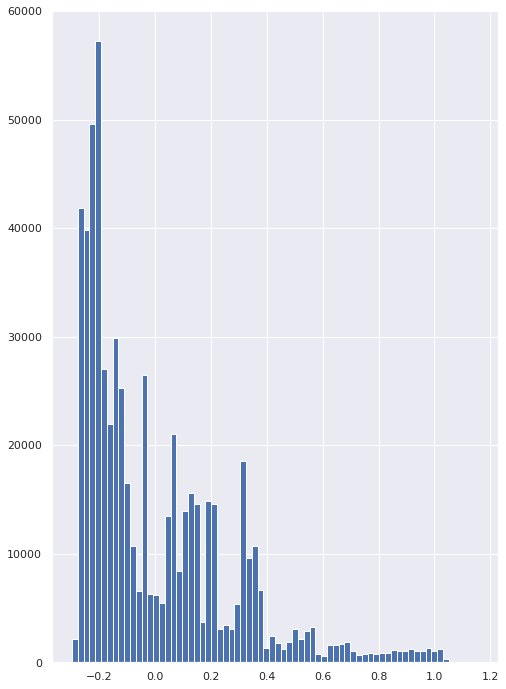

In [ ]:
plt.figure(figsize=(8, 12))
plt.hist(residual, bins=70)

Test Shapiro-Wolfa

In [ ]:
from scipy import stats

shapiro = stats.shapiro(y_pred)
shapiro

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1760: UserWarning:

p-value may not be accurate for N > 5000.



ShapiroResult(statistic=0.9346035718917847, pvalue=0.0)

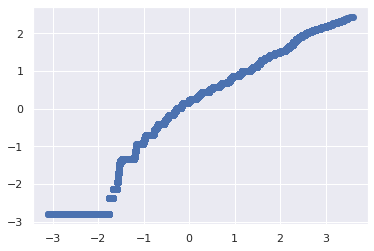

In [21]:
plt.scatter(y_train, y_pred)